In [ ]:
!pip install -q transformers datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("tchebonenko/MedicalTranscriptions")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


In [ ]:
dataset = dataset.remove_columns(['Unnamed: 0', 'description', 'sample_name', 'keywords'])

In [ ]:
dataset = dataset.rename_column("medical_specialty", "label")

In [ ]:
dataset = dataset.rename_column("transcription", "text")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4999
    })
})

In [ ]:
def filter_function(row):
  for column in row:
    if row[column] is None:
      return False
  return True

In [ ]:
dataset = dataset.filter(filter_function)
dataset = dataset['train']

Filter:   0%|          | 0/4999 [00:00<?, ? examples/s]

In [ ]:
def get_count(row):
  for column in row:
    if(len(row[column])<10 or row[column] is None):
      if len(row[column]) not in countDict:
        countDict[len(row[column])]  = 1
      else:
        countDict[len(row[column])] += 1
  return True

In [ ]:
countDict = {}

In [ ]:
dataset.filter(get_count)

Filter:   0%|          | 0/4966 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'text'],
    num_rows: 4966
})

In [ ]:
countDict

{8: 1275, 9: 47}

In [ ]:
print(dataset)

Dataset({
    features: ['label', 'text'],
    num_rows: 4966
})


In [ ]:
dataset = dataset.train_test_split(test_size=0.3)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 3476
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1490
    })
})

The dataset consists of tweets, labeled with one or more emotions.

Let's create a list that contains the labels, as well as 2 dictionaries that map labels to integers and back.

In [ ]:
labels = dataset['train'].unique("label")

In [ ]:
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}

In [ ]:
id2label

{0: ' Surgery',
 1: ' Consult - History and Phy.',
 2: ' Radiology',
 3: ' SOAP / Chart / Progress Notes',
 4: ' Cardiovascular / Pulmonary',
 5: ' Cosmetic / Plastic Surgery',
 6: ' ENT - Otolaryngology',
 7: ' Gastroenterology',
 8: ' Orthopedic',
 9: ' Neurosurgery',
 10: ' Urology',
 11: ' Emergency Room Reports',
 12: ' Discharge Summary',
 13: ' Pain Management',
 14: ' General Medicine',
 15: ' Neurology',
 16: ' Office Notes',
 17: ' Rheumatology',
 18: ' Endocrinology',
 19: ' Obstetrics / Gynecology',
 20: ' Nephrology',
 21: ' Pediatrics - Neonatal',
 22: ' Lab Medicine - Pathology',
 23: ' Ophthalmology',
 24: ' Hospice - Palliative Care',
 25: ' Hematology - Oncology',
 26: ' Psychiatry / Psychology',
 27: ' Bariatrics',
 28: ' Podiatry',
 29: ' Dentistry',
 30: ' Physical Medicine - Rehab',
 31: ' Sleep Medicine',
 32: ' Chiropractic',
 33: ' Allergy / Immunology',
 34: ' Letters',
 35: ' Dermatology',
 36: ' Diets and Nutritions',
 37: ' IME-QME-Work Comp etc.',
 38: ' S

In [ ]:
label2id

{' Surgery': 0,
 ' Consult - History and Phy.': 1,
 ' Radiology': 2,
 ' SOAP / Chart / Progress Notes': 3,
 ' Cardiovascular / Pulmonary': 4,
 ' Cosmetic / Plastic Surgery': 5,
 ' ENT - Otolaryngology': 6,
 ' Gastroenterology': 7,
 ' Orthopedic': 8,
 ' Neurosurgery': 9,
 ' Urology': 10,
 ' Emergency Room Reports': 11,
 ' Discharge Summary': 12,
 ' Pain Management': 13,
 ' General Medicine': 14,
 ' Neurology': 15,
 ' Office Notes': 16,
 ' Rheumatology': 17,
 ' Endocrinology': 18,
 ' Obstetrics / Gynecology': 19,
 ' Nephrology': 20,
 ' Pediatrics - Neonatal': 21,
 ' Lab Medicine - Pathology': 22,
 ' Ophthalmology': 23,
 ' Hospice - Palliative Care': 24,
 ' Hematology - Oncology': 25,
 ' Psychiatry / Psychology': 26,
 ' Bariatrics': 27,
 ' Podiatry': 28,
 ' Dentistry': 29,
 ' Physical Medicine - Rehab': 30,
 ' Sleep Medicine': 31,
 ' Chiropractic': 32,
 ' Allergy / Immunology': 33,
 ' Letters': 34,
 ' Dermatology': 35,
 ' Diets and Nutritions': 36,
 ' IME-QME-Work Comp etc.': 37,
 ' Speec

In [ ]:
!pip install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
model_name = "emilyalsentzer/Bio_ClinicalBERT"

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 3476
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1490
    })
})

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True, max_length=512)

In [ ]:
def preprocess_labels(examples):
  temp = []
  for val in examples['label']:
    temp.append(label2id[val])
    print("label2id[val]: ", label2id[val])
  examples['label']=temp
  return examples

In [ ]:
print(dataset['train']["label"])

[' Surgery', ' Consult - History and Phy.', ' Radiology', ' SOAP / Chart / Progress Notes', ' Consult - History and Phy.', ' Cardiovascular / Pulmonary', ' Cosmetic / Plastic Surgery', ' Surgery', ' ENT - Otolaryngology', ' SOAP / Chart / Progress Notes', ' Gastroenterology', ' Surgery', ' Orthopedic', ' Consult - History and Phy.', ' Neurosurgery', ' Surgery', ' Cardiovascular / Pulmonary', ' Surgery', ' Surgery', ' Orthopedic', ' Urology', ' Cardiovascular / Pulmonary', ' Emergency Room Reports', ' Orthopedic', ' Surgery', ' Orthopedic', ' ENT - Otolaryngology', ' Discharge Summary', ' Pain Management', ' Cardiovascular / Pulmonary', ' ENT - Otolaryngology', ' General Medicine', ' SOAP / Chart / Progress Notes', ' General Medicine', ' ENT - Otolaryngology', ' Orthopedic', ' Surgery', ' Surgery', ' General Medicine', ' Cardiovascular / Pulmonary', ' Orthopedic', ' Neurology', ' Neurosurgery', ' Surgery', ' Radiology', ' Cardiovascular / Pulmonary', ' Surgery', ' Cardiovascular / Pulmo

In [ ]:
print(tokenized_dataset['train']["label"])

[0, 1, 2, 3, 1, 4, 5, 0, 6, 3, 7, 0, 8, 1, 9, 0, 4, 0, 0, 8, 10, 4, 11, 8, 0, 8, 6, 12, 13, 4, 6, 14, 3, 14, 6, 8, 0, 0, 14, 4, 8, 15, 9, 0, 2, 4, 0, 4, 7, 16, 0, 0, 1, 8, 15, 6, 4, 1, 8, 0, 0, 2, 0, 2, 8, 3, 13, 15, 4, 8, 17, 7, 18, 0, 19, 0, 0, 1, 8, 1, 4, 0, 1, 0, 0, 3, 0, 4, 20, 4, 2, 21, 7, 20, 0, 1, 22, 2, 21, 10, 2, 0, 0, 0, 21, 0, 7, 4, 14, 14, 1, 4, 1, 0, 0, 23, 14, 1, 13, 4, 0, 7, 24, 0, 25, 1, 19, 1, 1, 1, 12, 4, 1, 23, 8, 0, 20, 0, 0, 1, 8, 12, 4, 15, 2, 14, 3, 6, 20, 0, 26, 0, 25, 27, 1, 14, 1, 1, 28, 1, 19, 25, 0, 0, 3, 3, 0, 1, 0, 14, 0, 1, 4, 0, 2, 1, 0, 15, 15, 1, 1, 4, 0, 9, 0, 19, 0, 7, 1, 16, 15, 2, 0, 0, 14, 14, 13, 0, 0, 4, 0, 0, 1, 0, 6, 21, 15, 8, 0, 1, 10, 7, 20, 3, 16, 4, 10, 0, 11, 26, 1, 7, 20, 4, 0, 15, 29, 3, 2, 14, 21, 11, 30, 10, 13, 7, 0, 2, 4, 19, 25, 9, 31, 0, 8, 4, 0, 1, 0, 0, 0, 0, 2, 0, 10, 0, 1, 0, 1, 0, 9, 28, 0, 0, 2, 7, 0, 1, 0, 1, 29, 4, 32, 16, 2, 6, 0, 0, 13, 8, 4, 14, 7, 0, 14, 25, 15, 0, 1, 0, 14, 7, 14, 0, 33, 8, 26, 8, 15, 34, 2, 19, 0, 

In [ ]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/3476 [00:00<?, ? examples/s]

Map:   0%|          | 0/1490 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset = tokenized_dataset.map(preprocess_labels, batched=True)

Map:   0%|          | 0/3476 [00:00<?, ? examples/s]

label2id[val]:  0
label2id[val]:  1
label2id[val]:  2
label2id[val]:  3
label2id[val]:  1
label2id[val]:  4
label2id[val]:  5
label2id[val]:  0
label2id[val]:  6
label2id[val]:  3
label2id[val]:  7
label2id[val]:  0
label2id[val]:  8
label2id[val]:  1
label2id[val]:  9
label2id[val]:  0
label2id[val]:  4
label2id[val]:  0
label2id[val]:  0
label2id[val]:  8
label2id[val]:  10
label2id[val]:  4
label2id[val]:  11
label2id[val]:  8
label2id[val]:  0
label2id[val]:  8
label2id[val]:  6
label2id[val]:  12
label2id[val]:  13
label2id[val]:  4
label2id[val]:  6
label2id[val]:  14
label2id[val]:  3
label2id[val]:  14
label2id[val]:  6
label2id[val]:  8
label2id[val]:  0
label2id[val]:  0
label2id[val]:  14
label2id[val]:  4
label2id[val]:  8
label2id[val]:  15
label2id[val]:  9
label2id[val]:  0
label2id[val]:  2
label2id[val]:  4
label2id[val]:  0
label2id[val]:  4
label2id[val]:  7
label2id[val]:  16
label2id[val]:  0
label2id[val]:  0
label2id[val]:  1
label2id[val]:  8
label2id[val]:  15


Map:   0%|          | 0/1490 [00:00<?, ? examples/s]

label2id[val]:  4
label2id[val]:  13
label2id[val]:  25
label2id[val]:  7
label2id[val]:  7
label2id[val]:  3
label2id[val]:  0
label2id[val]:  3
label2id[val]:  8
label2id[val]:  0
label2id[val]:  2
label2id[val]:  0
label2id[val]:  2
label2id[val]:  1
label2id[val]:  4
label2id[val]:  23
label2id[val]:  2
label2id[val]:  28
label2id[val]:  12
label2id[val]:  0
label2id[val]:  0
label2id[val]:  4
label2id[val]:  0
label2id[val]:  25
label2id[val]:  0
label2id[val]:  1
label2id[val]:  4
label2id[val]:  15
label2id[val]:  14
label2id[val]:  0
label2id[val]:  3
label2id[val]:  11
label2id[val]:  26
label2id[val]:  1
label2id[val]:  14
label2id[val]:  1
label2id[val]:  1
label2id[val]:  0
label2id[val]:  28
label2id[val]:  0
label2id[val]:  16
label2id[val]:  8
label2id[val]:  7
label2id[val]:  8
label2id[val]:  4
label2id[val]:  22
label2id[val]:  4
label2id[val]:  1
label2id[val]:  8
label2id[val]:  0
label2id[val]:  0
label2id[val]:  0
label2id[val]:  15
label2id[val]:  34
label2id[val

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3476
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1490
    })
})

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer, pad_to_multiple_of=8)

In [ ]:
!pip install evaluate

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=40, id2label=id2label, label2id=label2id
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
! pip install -U accelerate
! pip install -U transformers
from transformers import TrainingArguments, Trainer

In [ ]:
# torch.cuda.empty_cache()
# !nvidia-smi

Tue Jan  9 13:14:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0              30W /  70W |  15095MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.315211,0.324832
2,2.557300,2.124630,0.326846


TrainOutput(global_step=870, training_loss=2.356634451329023, metrics={'train_runtime': 828.9746, 'train_samples_per_second': 8.386, 'train_steps_per_second': 1.049, 'total_flos': 1829772137791488.0, 'train_loss': 2.356634451329023, 'epoch': 2.0})

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available. Using GPU.")
else:
    device = torch.device("cpu")
    print("No GPU available. Using CPU.")


GPU available. Using GPU.


In [ ]:
text = "bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, band, loss, diets, overweight, lost"

In [ ]:
inputs = tokenizer(text, return_tensors="pt")
inputs = inputs.to(device)
with torch.no_grad():
    logits = model(**inputs).logits

In [ ]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

' Consult - History and Phy.'

PRE-TRAINED

In [ ]:
text = "bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, band, loss, diets, overweight, lost"

In [ ]:
# from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer(text, return_tensors="pt")

In [ ]:
from transformers import AutoModelForSequenceClassification

pre_trained_model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=40, id2label=id2label, label2id=label2id
)
with torch.no_grad():
    logits = pre_trained_model(**inputs).logits

In [ ]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

' Chiropractic'

In [ ]:
print(predicted_class_id)
print(logits)

32
tensor([[ 0.4032, -0.2563, -0.3692, -0.0490, -0.3859, -0.1585,  0.0680, -0.0852,
         -0.7742, -0.2110, -0.1155, -0.1873, -0.2803, -0.2271,  0.5284, -0.2939,
         -0.3896, -0.0098,  0.0022, -0.4028, -0.4377,  0.4173,  0.4798,  0.0685,
          0.2697,  0.0343,  0.3064, -0.3249, -0.8802, -0.2828, -0.2379, -0.1967,
          0.8308, -0.0281,  0.0201, -0.4383, -0.0159, -0.4116,  0.1359, -0.2253]])


Metrics

In [139]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 3476
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1490
    })
})

In [142]:
y_pred = []
y_true = []

for example in dataset['train']:
    text = example['text']
    label = example['label']
    y_true.append(label)
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length = 512)
    inputs = inputs.to(device)
    with torch.no_grad():
      logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    pred = model.config.id2label[predicted_class_id]
    y_pred.append(pred)
    # print(f"Text: {text}\nLabel: {label}\n")


In [143]:
print(y_pred)

[' Surgery', ' Consult - History and Phy.', ' Radiology', ' Orthopedic', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Surgery', ' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Orthopedic', ' Consult - History and Phy.', ' Orthopedic', ' Surgery', ' Consult - History and Phy.', ' Surgery', ' Surgery', ' Orthopedic', ' Consult - History and Phy.', ' Cardiovascular / Pulmonary', ' Consult - History and Phy.', ' Surgery', ' Surgery', ' Surgery', ' Consult - History and Phy.', ' Discharge Summary', ' Surgery', ' Radiology', ' Surgery', ' Consult - History and Phy.', ' Orthopedic', ' Consult - History and Phy.', ' Surgery', ' Orthopedic', ' Surgery', ' Surgery', ' Consult - History and Phy.', ' Surgery', ' Orthopedic', ' Radiology', ' Surgery', ' Surgery', ' Radiology', ' Consult - History and Phy.', ' Cardiovascular / Pulmonary', ' Surgery', ' Gastroenterology', ' Consult - History and Phy.', ' Surgery', ' Surgery', ' Or

In [144]:
print(y_true)

[' Surgery', ' Consult - History and Phy.', ' Radiology', ' SOAP / Chart / Progress Notes', ' Consult - History and Phy.', ' Cardiovascular / Pulmonary', ' Cosmetic / Plastic Surgery', ' Surgery', ' ENT - Otolaryngology', ' SOAP / Chart / Progress Notes', ' Gastroenterology', ' Surgery', ' Orthopedic', ' Consult - History and Phy.', ' Neurosurgery', ' Surgery', ' Cardiovascular / Pulmonary', ' Surgery', ' Surgery', ' Orthopedic', ' Urology', ' Cardiovascular / Pulmonary', ' Emergency Room Reports', ' Orthopedic', ' Surgery', ' Orthopedic', ' ENT - Otolaryngology', ' Discharge Summary', ' Pain Management', ' Cardiovascular / Pulmonary', ' ENT - Otolaryngology', ' General Medicine', ' SOAP / Chart / Progress Notes', ' General Medicine', ' ENT - Otolaryngology', ' Orthopedic', ' Surgery', ' Surgery', ' General Medicine', ' Cardiovascular / Pulmonary', ' Orthopedic', ' Neurology', ' Neurosurgery', ' Surgery', ' Radiology', ' Cardiovascular / Pulmonary', ' Surgery', ' Cardiovascular / Pulmo

In [146]:
y_pred_idx = []
for val in y_pred:
  y_pred_idx.append(label2id[val])

In [147]:
y_true_idx = []
for val in y_true:
  y_true_idx.append(label2id[val])

In [148]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

In [149]:
accuracy_score(y_true_idx, y_pred_idx)

0.4105293440736479

In [161]:
recall_score(y_true_idx, y_pred_idx, average='micro')

0.4105293440736479

In [160]:
f1_score(y_true_idx, y_pred_idx, average='micro')

0.4105293440736479

In [154]:
classification_report(y_true_idx, y_pred_idx)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.47      0.83      0.60       780\n           1       0.31      0.92      0.46       365\n           2       0.41      0.60      0.49       184\n           3       0.00      0.00      0.00       113\n           4       0.47      0.22      0.30       251\n           5       0.00      0.00      0.00        19\n           6       0.33      0.02      0.03        64\n           7       0.49      0.53      0.51       176\n           8       0.41      0.48      0.44       252\n           9       0.00      0.00      0.00        68\n          10       0.50      0.01      0.02       101\n          11       0.00      0.00      0.00        52\n          12       0.48      0.14      0.22        76\n          13       0.00      0.00      0.00        43\n          14       0.00      0.00      0.00       169\n          15       0.41      0.22      0.28       156\n          16       0.00      0.00      0.00        34\n       

<Figure size 4000x4000 with 0 Axes>

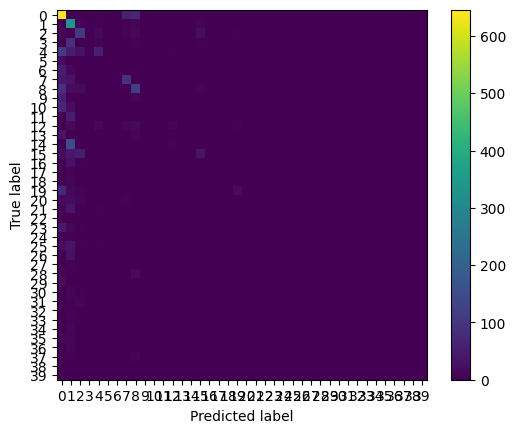

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true_idx, y_pred_idx, include_values=False)
plt.show()